##### ENIT 2023-2024
<center><h1> Cours Machine Leraning </h1></center>
    
    
#### Classes 3AGI 2 & M2: Neprev+SDACS

##### Enseignante:  Radhia Bessi    

##   Unsupervised Learning : Clustering et réduction de dimension

C'est quoi le Clustering?
Le clustering ou l'analyse de regroupement est une méthode de classification qui consiste à regrouper un ensemble d'objets de telle manière que les objets appartenant à un même groupe sont plus similaires entre eux qu'avec ceux des autres groupes. Ces groupes sont appelés clusters, et la mesure de similarité entre les objets peut être déterminée de différentes façons.

Exemples : Clustering basé sur la partition : par exemple, k-means, k-modes, k-prototypes. Clustering hiérarchique : méthode qui construit une hiérarchie de clusters.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
pd.options.display.max_columns= None
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:

df = pd.read_csv(r"/content/iris - iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


####  Exploring data

In [46]:
# shape of dataframe df
print(df.shape)
# Types de variables
df.dtypes

(150, 5)


,0
sepal.length,float64
sepal.width,float64
petal.length,float64
petal.width,float64
variety,object


In [47]:
#noms des varibles (en liste)
cols = list(df.columns)
print(cols)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']


In [49]:
#description statiqtique
df.describe(include='all')

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [50]:
#Valeurs extèmes des variables
liste = ['sepal.length','sepal.width','petal.length','petal.width']

<Axes: >

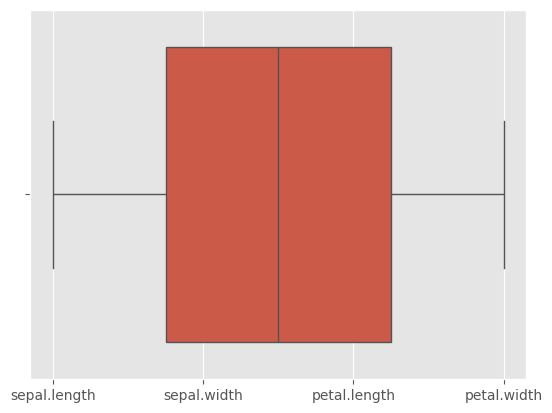

In [70]:
sns.boxplot(data =liste, orient = 'h')

In [52]:
#Mtrice de correlation
correlations = df[liste].corr(method='pearson')

<Axes: >

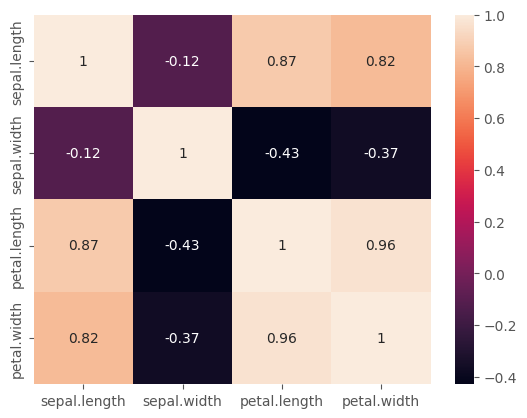

In [53]:
sns.heatmap(correlations,annot=True)

In [54]:
new_df = df.drop('variety', axis=1)


In [56]:
labels = df['variety']


## Scaling the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

**KMeans**
K-means algorithm is the unsupervised machine learning algorithm in which whole data is divided into K number of clusters. Every cluster has its centroid which is calculated by averaging the data points of that cluster:

How does K – means algorithm works?
* Initialize ‘ K’ and centroid values.
* Assign data points to the closest clusters, by calculating the Euclidean distance.
* When the clusters are formed, recompute their centroid values by calculating the average of data points.
* Repeat steps 2 & 3 until all the clusters are stable.

WCSS (Within-Cluster Sum of Square) is the sum of the squared distance between each point and the centroid in a cluster

Suitable method when we know number of clusters and we have a large data (more then 500)

# K-means (clustring)
Les k-moyennes sont notamment utilisées en apprentissage non supervisé où l'on divise des observations en k partitions.
Étant donné un ensemble de points (x1, x2, …, xn), on cherche à partitionner les n points en k ensembles $S = \{S_1, S_2, …, S_k\} (k ≤ n)$ en minimisant la distance entre les points à l'intérieur de chaque partition :

$$\arg\min_{S}\sum_{i=1}^k \sum_{x_j\in S_i}\|x_j-\mu_i\|,$$
où $\mu_i$ est le baycentre des points dans l'ensemble $S_i$

## Algorithme
(Wikipédia)
Choisir $k$ points qui représentent la position moyenne des partitions $m_1^{(1)}, …, m_k^{(1)}$ initiales (au hasard par exemple)

 Répéter jusqu'à ce qu'il y ait convergence :

   -affecter chaque observation à la partition la plus proche: c à d:
   $$S_i^{(t)}=\{x_j/ \|x_j-m_i^{(t)}\|\leq \|x_j-m_{i^*}^{(t)}\|, \forall i^*=1,...,k$$
   – mettre à jour la moyenne de chaque cluster :
      $$m_i^{(t+1)}=\frac{1}{|S_i^{(t)}|}\sum_{x_j\in S_i^{(t)}} x_j$$

In [57]:
from sklearn.cluster import KMeans

In [59]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It             differs from the vanilla k-means++ b

In [61]:
kmeans = KMeans(n_clusters =5, init = 'k-means++', random_state =0)

kmeans.fit(new_df.values)
y_kmeans=kmeans.labels_
print(kmeans.inertia_)

46.44618205128204


Text(0.5, 1.0, 'Clusters ')

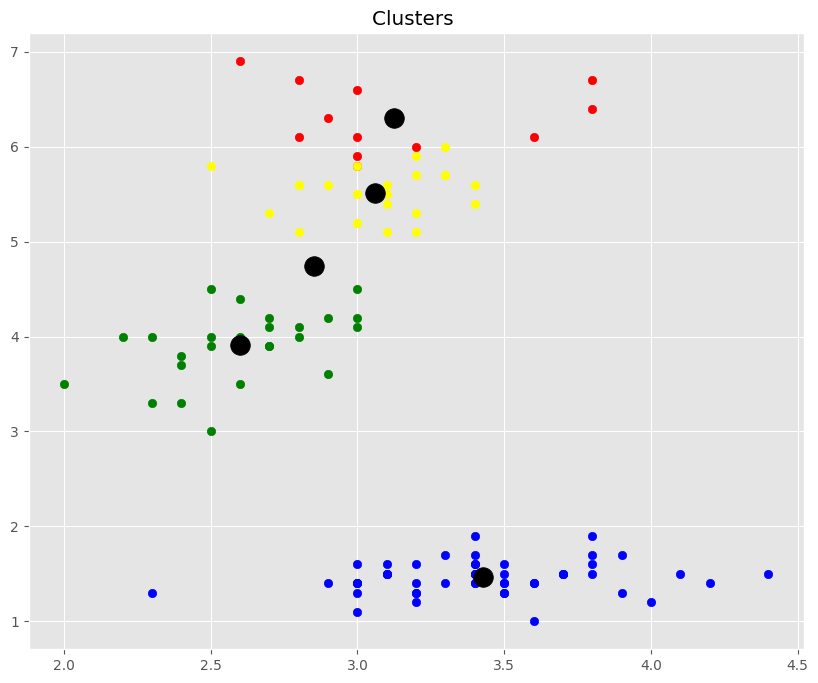

In [62]:
#Visualizing the clusters
plt.figure(figsize=(10,8))
plt.scatter(df.values[y_kmeans==0,1],df.values[y_kmeans==0,2],c='red',label = 'Cluster 0')
plt.scatter(df.values[y_kmeans==1,1],df.values[y_kmeans==1,2],c='blue',label = 'Cluster 1')
plt.scatter(df.values[y_kmeans==2,1],df.values[y_kmeans==2,2],c='green',label = 'Cluster 2')
plt.scatter(df.values[y_kmeans==3,1],df.values[y_kmeans==3,2],c='yellow',label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters ')

#for label,x,y

In [63]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(new_df.values)
    wcss.append(kmeans.inertia_)


### How to choose optimal value of K
When we plot the WCSS with the K value, the plot looks like an Elbow. We select the value of K at the elbow point in the graph, i.e., after which the value of WSCC remains constant (parallel to the x-axis) or At which, the graph will decrease abruptly.

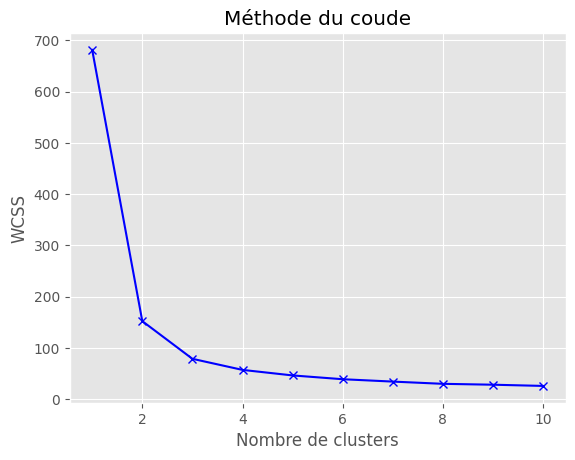

In [64]:
plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude')
plt.show()


In [65]:
pip install kneed

In [67]:
from kneed import KneeLocator

# Assuming you have already computed wcss
k = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
elbow = k.elbow

print(f"The optimal number of clusters is: {elbow}")


The optimal number of clusters is: 3


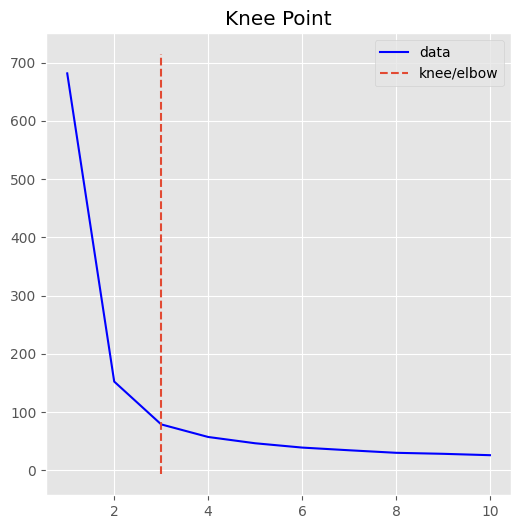

In [68]:
k.plot_knee()

In [69]:
# Assuming `elbow` contains the optimal number of clusters
optimal_clusters = k.elbow

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=0)

# Fit the model to the data
kmeans.fit(new_df.values)

# Assign labels to each data point
y_kmeans = kmeans.labels_


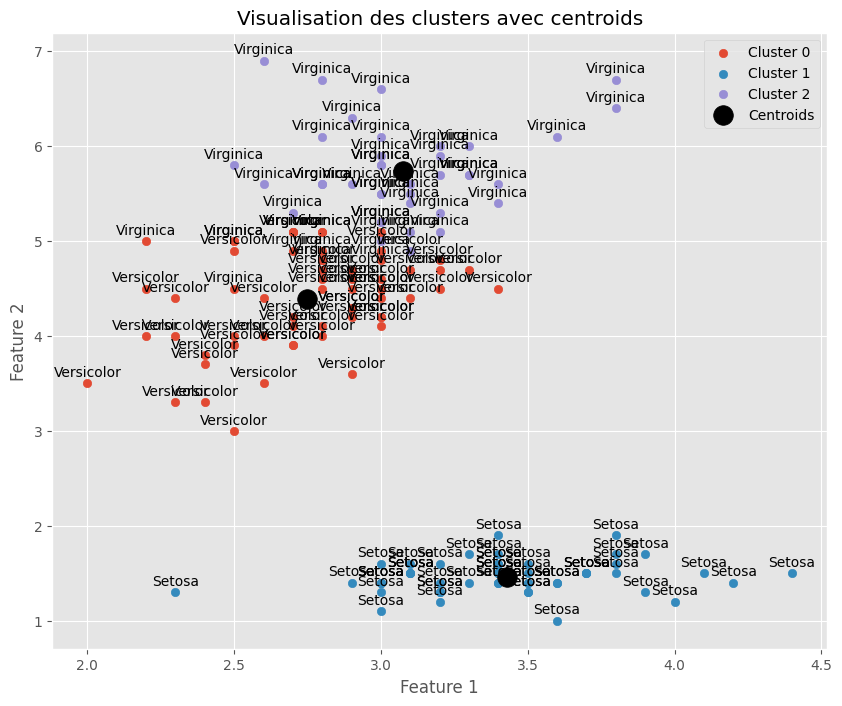

In [ ]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(10, 8))

# Scatter plot of clusters
for i in range(optimal_clusters):
    plt.scatter(new_df.values[y_kmeans == i, 1], new_df.values[y_kmeans == i, 2], label=f'Cluster {i}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='black', label='Centroids')

# Annotate each data point with its label
for label, x, y in zip(labels, df.values[:, 1], df.values[:, 2]):
    plt.annotate(label, xy=(x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Feature 1')  # Replace with your actual feature names if needed
plt.ylabel('Feature 2')  # Replace with your actual feature names if needed
plt.title('Visualisation des clusters avec centroids')
plt.legend()
plt.show()


In [ ]:
new_df.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
%matplotlib inline
#import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly as py

In [ ]:
y_labels= kmeans.labels_
#Create a 3d plot to view the data sepparation made by Kmeans

trace1 = go.Scatter3d(
    x= new_df['sepal.length'],
    y= new_df['petal.length'],
    z= new_df['petal.width'],
    mode='markers',
     marker=dict(
        color = y_labels,
        size= 20,
        line=dict(
            color= y_labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'sepal.length'),
            yaxis = dict(title  = 'petal.length'),
            zaxis = dict(title  = 'petal.width')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

In [71]:
#Projection
from sklearn.decomposition import PCA

In [72]:
from sklearn.decomposition import PCA

# Set the number of components (e.g., 2 for 2D visualization)
pca = PCA(n_components=2)

# Transform the data
X = new_df.values
X_pca = pca.fit_transform(X)

# Print the shape of the transformed data
print(X_pca.shape)

# Print the explained variance ratio of each principal component
print(pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio of the first two components
print(sum(pca.explained_variance_ratio_[:2]))




(150, 2)
[0.92461872 0.05306648]
0.977685206318795


Text(0, 0.5, 'PC2')

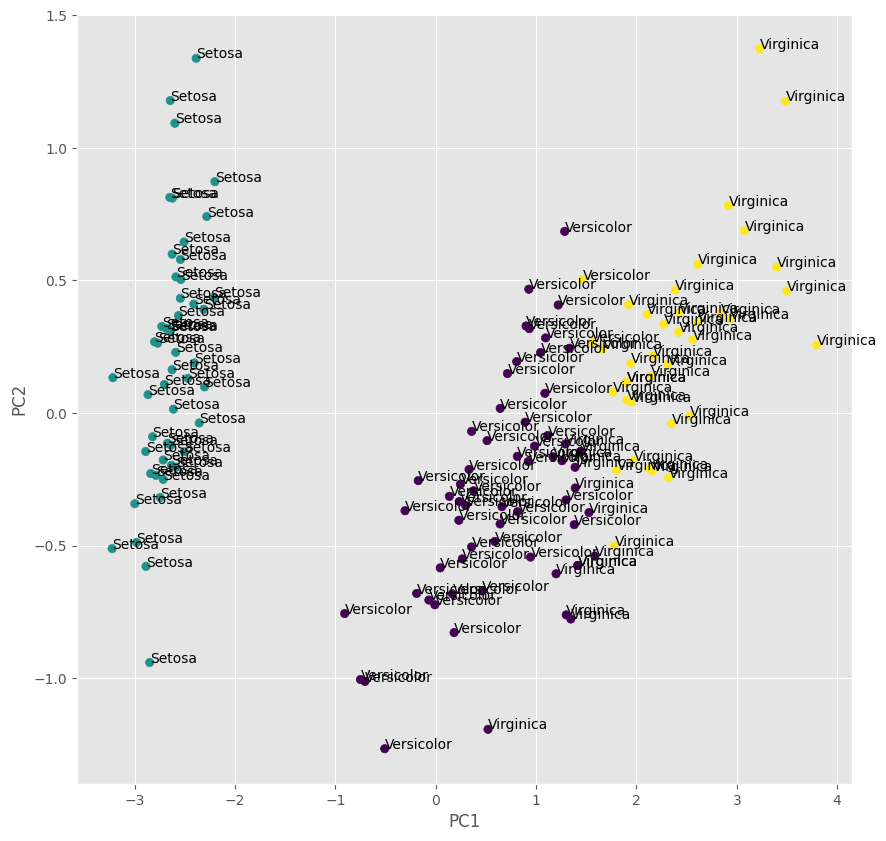

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_labels)
for label,x,y in zip(labels, X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PC1')
plt.ylabel('PC2')

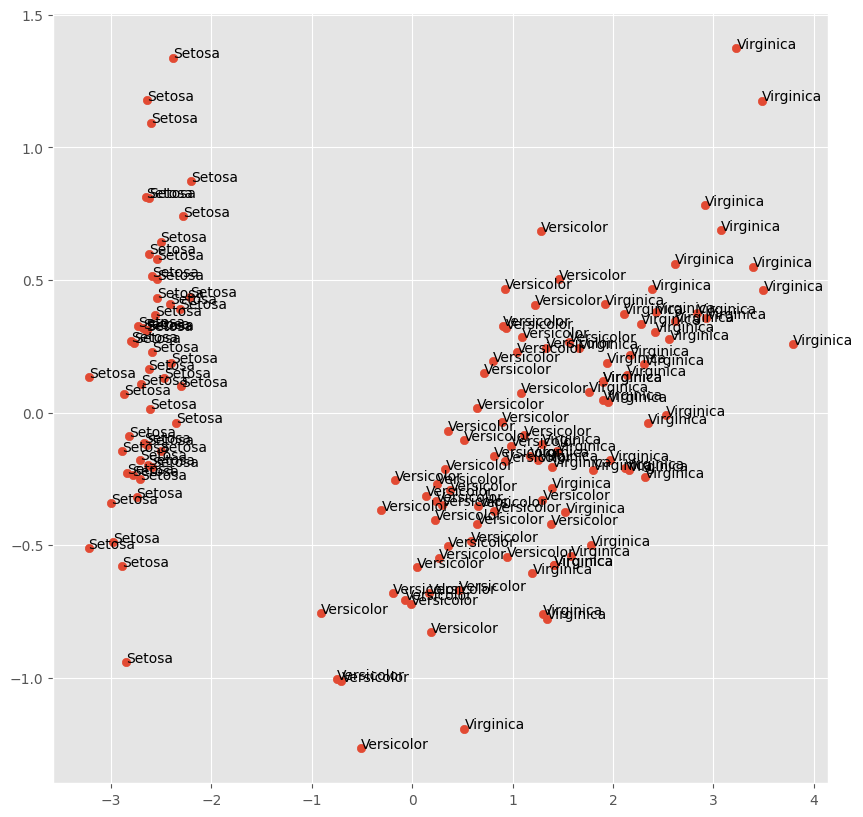

In [74]:
#Représenter les pts de deux composantes principales en clustering
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1])

for label,x,y in zip(labels, X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))

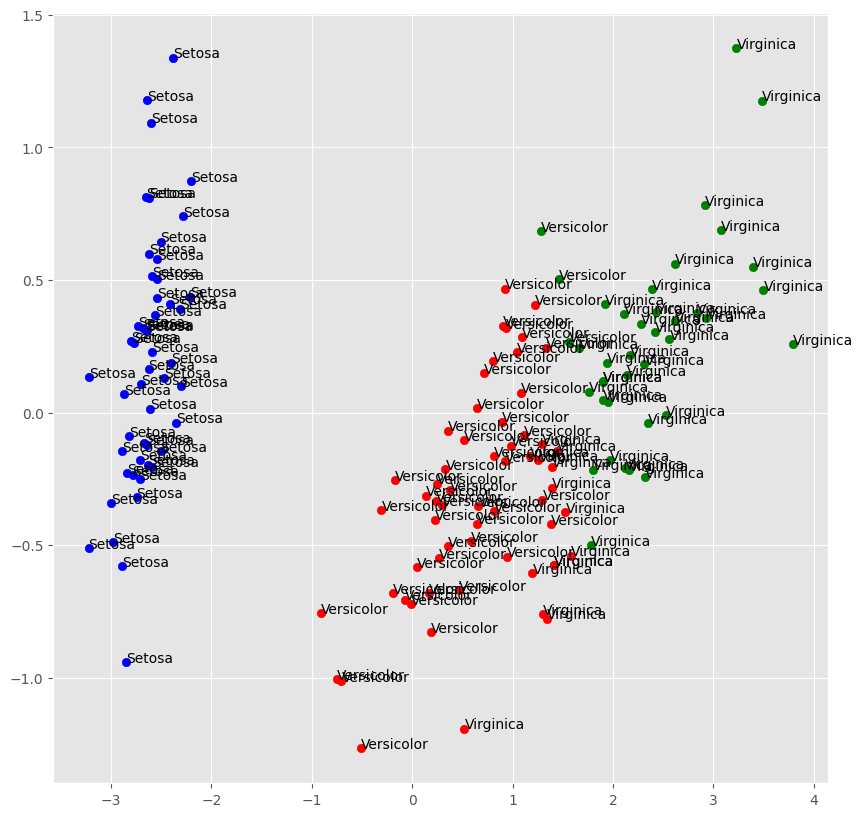

In [ ]:
#Représenter les pts de deux composantes principales en clustering
????

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, init='pca', random_state=0, n_jobs=-1)

# Fit and transform the data
X_tsne = tsne.fit_transform(new_df.values)

# Print the shape of the transformed data
print(X_tsne.shape)


(150, 2)


<Axes: xlabel='DIM1', ylabel='DIM2'>

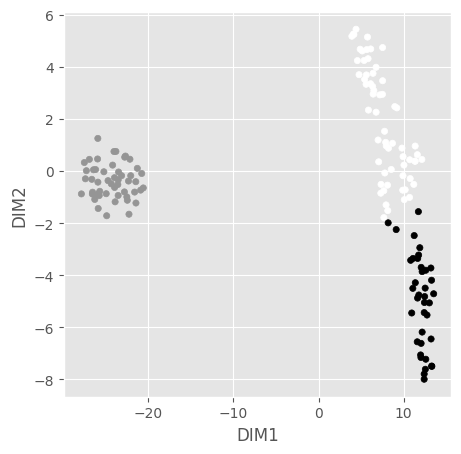

In [ ]:
columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, index=new_df.index, columns=columns)
X_tsne.head()

X_tsne.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), c=y_labels)

In [76]:
from sklearn.manifold import TSNE

# Initialize t-SNE for 3D projection
tsne = TSNE(n_components=3, init='pca', perplexity=45, random_state=0, n_jobs=-1)

# Fit and transform the data
X_tsne = tsne.fit_transform(new_df.values)

# Print the shape of the transformed data
print(X_tsne.shape)


(150, 3)


In [77]:
columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, index=new_df.index, columns=columns)
X_tsne.head()

,DIM1,DIM2,DIM3
0,-9.111658,-1.225001,0.369236
1,-8.748725,-0.385294,-0.251714
2,-9.018929,-0.278704,0.440201
3,-9.554638,0.051717,-0.100655
4,-9.553691,-1.099656,0.575839


In [78]:
%matplotlib inline
#import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly as py

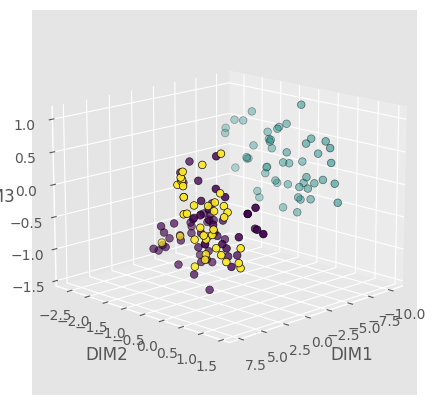

In [79]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tsne['DIM1'], X_tsne['DIM2'], X_tsne['DIM3'], marker='o', s=30, edgecolor='k', c=y_labels)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=45)

In [80]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


In [85]:
pip install umap-learn


In [86]:
from umap import UMAP

In [87]:
embedding = umap.UMAP(n_components=2, random_state=0, n_jobs=-1)
X_umap = embedding.fit_transform(X)
columns = ['DIM' + str(c) for c in range(1, X_umap.shape[1]+1, 1)]
X_umap = pd.DataFrame(X_umap, index=X.index, columns=columns)

NameError: name 'umap' is not defined

**Méthode de la Silhouette**

silhouette coefficient $s(i)$ of every point calculates the average distance of points within its cluster $a(i)$ and the average distance of the points to its next closest cluster called $b(i)$.
$$s(i)=\frac{b(i)-a(i)}{\max(a(i),b(i))}$$
Then we can calculate the average silhouette coefficient of all the points in the clusters and plot the silhouette graph.
K optimal corresponds to the maximum of the silhoutte graph.

In [88]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

cluster_range = range(2, 9)
silhouette = []

for k in cluster_range:
    # Initialize KMeans with k clusters
    cluster = KMeans(n_clusters=k, init='k-means++', random_state=0)

    # Fit the model
    cluster.fit(new_df.values)

    # Get cluster labels
    cluster_labels = cluster.labels_

    # Compute the silhouette score
    silhouette_avg = silhouette_score(new_df.values, cluster_labels)

    # Append the silhouette score to the list
    silhouette.append(silhouette_avg)

    # Print the silhouette score for each k (optional)
    print(f'For n_clusters = {k}, silhouette avg = {silhouette_avg}')


For n_clusters = 2, silhouette avg = 0.6810461692117465
For n_clusters = 3, silhouette avg = 0.5528190123564102
For n_clusters = 4, silhouette avg = 0.49805050499728815
For n_clusters = 5, silhouette avg = 0.48874888709310654
For n_clusters = 6, silhouette avg = 0.36483400396700366
For n_clusters = 7, silhouette avg = 0.3568618172536383
For n_clusters = 8, silhouette avg = 0.3597454923845774


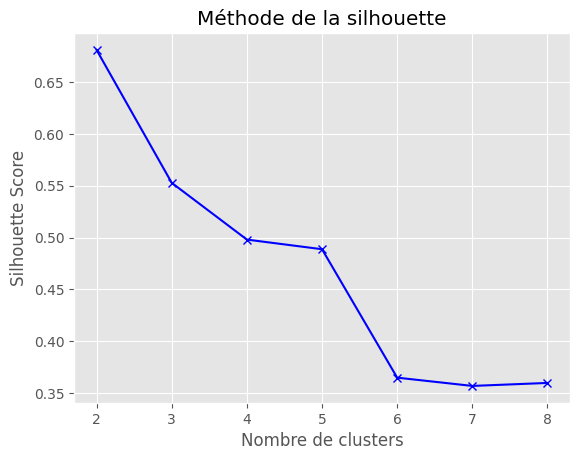

In [89]:
import matplotlib.pyplot as plt

# Plot silhouette scores
plt.plot(cluster_range, silhouette, 'bx-')

# Add labels and title
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')
plt.title('Méthode de la silhouette')

# Display the plot
plt.show()


In [90]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

cluster_range = range(2, 9)
random_range = range(0, 5)

silhouette = []
sil = []

for k in cluster_range:
    for j in random_range:
        # Initialize KMeans with k clusters and a random seed j
        cluster = KMeans(n_clusters=k, init='k-means++', random_state=j)

        # Fit the model
        cluster.fit(new_df.values)

        # Get cluster labels
        cluster_labels = cluster.labels_

        # Compute the silhouette score
        silhouette_avg = silhouette_score(new_df.values, cluster_labels)

        # Append the silhouette score to the list
        sil.append(silhouette_avg)

        # Print the silhouette score for each k and seed
        print(f'For n_clusters = {k} and seed = {j}, silhouette avg = {silhouette_avg}')

        # Append the results to the silhouette list
        silhouette.append([k, j, silhouette_avg])


For n_clusters = 2 and seed = 0, silhouette avg = 0.6810461692117465
For n_clusters = 2 and seed = 1, silhouette avg = 0.6810461692117465
For n_clusters = 2 and seed = 2, silhouette avg = 0.6810461692117465
For n_clusters = 2 and seed = 3, silhouette avg = 0.6810461692117465
For n_clusters = 2 and seed = 4, silhouette avg = 0.6810461692117465
For n_clusters = 3 and seed = 0, silhouette avg = 0.5528190123564102
For n_clusters = 3 and seed = 1, silhouette avg = 0.5528190123564102
For n_clusters = 3 and seed = 2, silhouette avg = 0.5528190123564102
For n_clusters = 3 and seed = 3, silhouette avg = 0.5528190123564102
For n_clusters = 3 and seed = 4, silhouette avg = 0.5528190123564102
For n_clusters = 4 and seed = 0, silhouette avg = 0.49805050499728815
For n_clusters = 4 and seed = 1, silhouette avg = 0.4974551890173758
For n_clusters = 4 and seed = 2, silhouette avg = 0.49805050499728815
For n_clusters = 4 and seed = 3, silhouette avg = 0.49805050499728815
For n_clusters = 4 and seed = 4

In [91]:
# add cluster label to oiginal data frame
df_cluster = pd.concat([df, pd.DataFrame({'Cluster' : y_kmeans})],axis= 1)

In [92]:
df_cluster.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety,Cluster
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1
5,5.4,3.9,1.7,0.4,Setosa,1
6,4.6,3.4,1.4,0.3,Setosa,1
7,5.0,3.4,1.5,0.2,Setosa,1
8,4.4,2.9,1.4,0.2,Setosa,1
9,4.9,3.1,1.5,0.1,Setosa,1


In [93]:
df_cluster.shape

(150, 6)

In [94]:
X_cluster = new_df#df_cluster.iloc[:,1:8]
y_cluster = y_kmeans #df_cluster.iloc[:,8]

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Create a scaler object
scaler = StandardScaler()
cluster_centers = scaler.inverse_transform(cluster_centers)# en cas sde scaling
cluster_centers = pd.DataFrame(data = cluster_centers, columns = df.columns)
cluster_centers

NameError: name 'cluster_centers' is not defined

** Hierarchical Agglomerative clustering: Regrourpement Hiérarchique**

Hierarchical Agglomerative clustering starts with treating each observation as an individual cluster, and then iteratively merges clusters until all the data points are merged into a single cluster. Dendrograms are used to represent hierarchical clustering results.
Dendogram is drawn based on distances to merge clusters.

Hierarchical divisive clustring is the reverse of the agglomerative algorithm as it is a top-down approach.
https://www.javatpoint.com/hierarchical-clustering-in-machine

In [98]:
pip install kmodes


In [99]:
#kprototype
from kmodes.kprototypes import KPrototypes


In [100]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


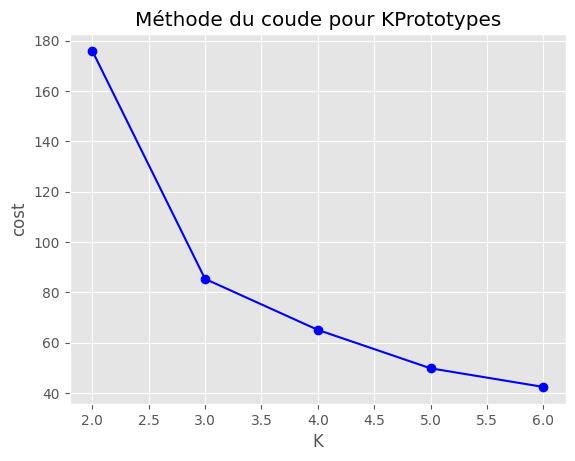

In [103]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sample data
# X_K should be your DataFrame with mixed data types

# Identify categorical columns
categorical_columns = ['variety']  # Replace with your actual categorical column names

# Convert categorical columns to numerical values
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X_K[col] = le.fit_transform(X_K[col])
    label_encoders[col] = le

# Choosing optimal K value
cost = []
for num_clusters in list(range(2, 7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42, n_jobs=-2, max_iter=15, n_init=50)
    kproto.fit(X_K, categorical=[X_K.columns.get_loc(col) for col in categorical_columns])
    cost.append(kproto.cost_)

# Plotting the cost against the number of clusters
plt.plot(range(2, 7), cost, 'bo-')
plt.xlabel('K')
plt.ylabel('cost')
plt.title('Méthode du coude pour KPrototypes')
plt.show()




In [104]:
from kmodes.kprototypes import KPrototypes

# Assuming optimal number of clusters is 3 (replace with your actual optimal number)
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42, n_jobs=-2, max_iter=15, n_init=50)

# Fit and predict cluster labels
cluster_labels = kproto.fit_predict(X_K, categorical=[4])  # Replace 4 with the index of your categorical column


In [105]:
y_kproto=kproto.labels_


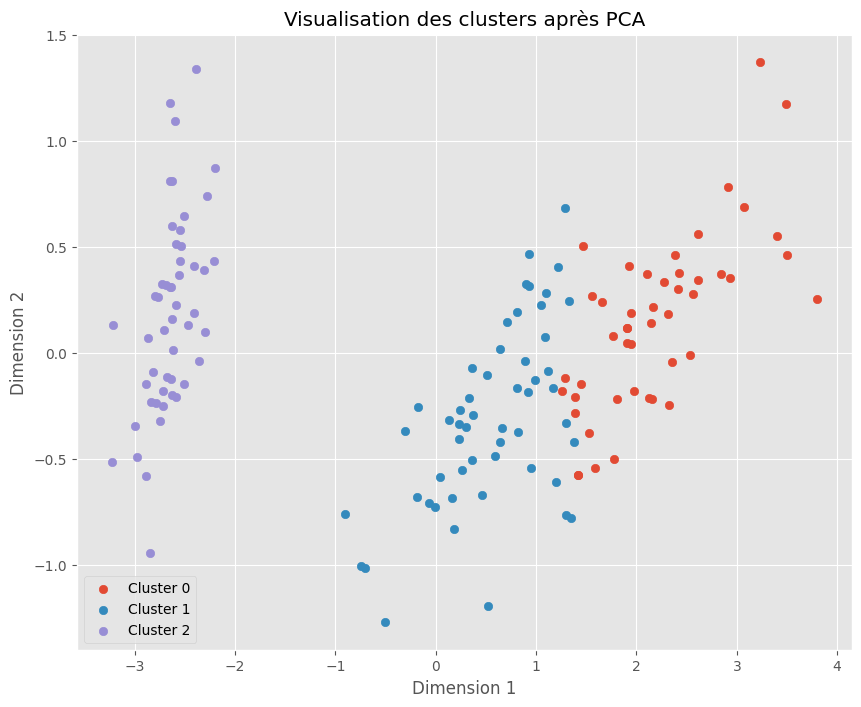

In [106]:
import matplotlib.pyplot as plt

# Assuming 'cluster_labels' contains the labels from the KPrototypes clustering
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster
for cluster in range(kproto.n_clusters):
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1],
                label=f'Cluster {cluster}')

# Adding centroids (if needed)
# centroids_pca = pca.transform(kproto.cluster_centroids_)
# plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='black', marker='x', label='Centroids')

plt.title('Visualisation des clusters après PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [107]:
from IPython.display import Image
Image('Agglomirative-Hiaerchical.PNG')

FileNotFoundError: No such file or directory: 'Agglomirative-Hiaerchical.PNG'

FileNotFoundError: No such file or directory: 'Agglomirative-Hiaerchical.PNG'

<IPython.core.display.Image object>

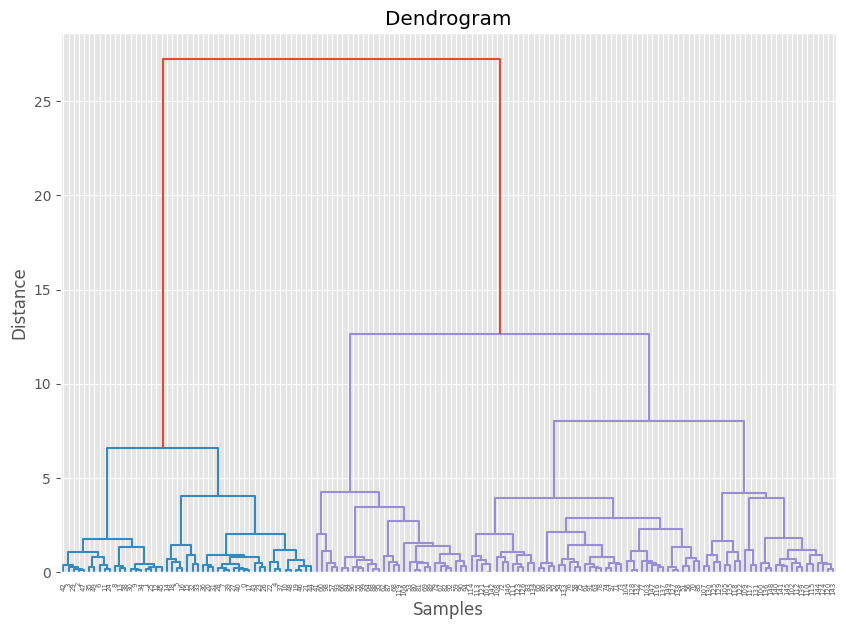

In [110]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
df = pd.read_csv(r"/content/iris - iris.csv")

# Assuming 'variety' is categorical and needs to be encoded
# Encode categorical columns if needed
categorical_columns = ['variety']  # Replace with your actual categorical column names
for col in categorical_columns:
    df[col] = pd.factorize(df[col])[0]  # Simple encoding

# Extract features (excluding the categorical column if needed)
X = df.drop(columns=['variety'])  # Adjust if you have different columns

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the linkage matrix
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [111]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
hc.fit(new_df)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [112]:
y_hc = hc.labels_

In [113]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

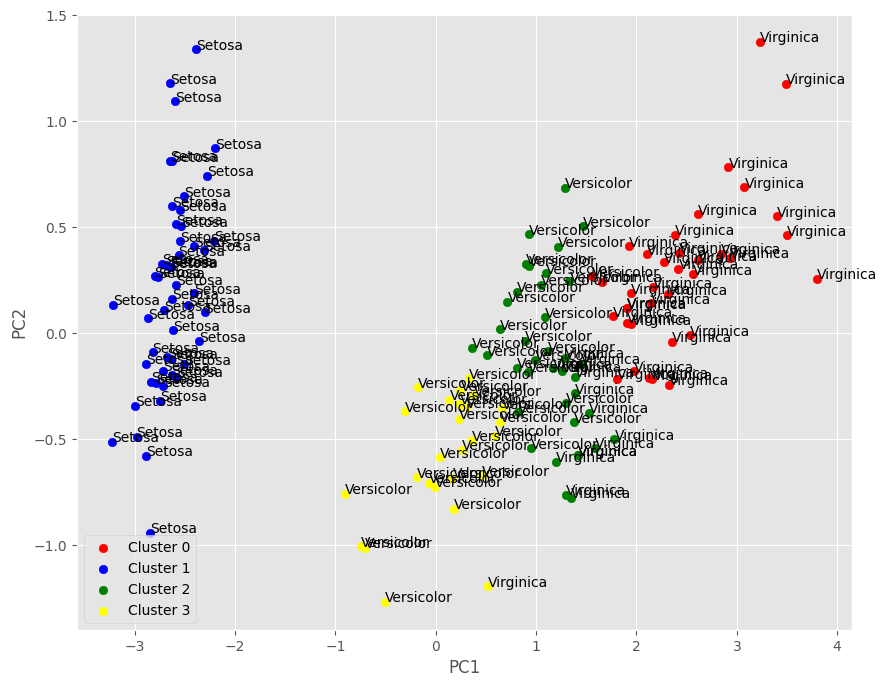

In [114]:
plt.figure(figsize=(10,8))
plt.scatter(X_pca[y_hc==0,0],X_pca[y_hc==0,1],c='red',label = 'Cluster 0')
plt.scatter(X_pca[y_hc==1,0],X_pca[y_hc==1,1],c='blue',label = 'Cluster 1')
plt.scatter(X_pca[y_hc==2,0],X_pca[y_hc==2,1],c='green',label = 'Cluster 2')
plt.scatter(X_pca[y_hc==3,0],X_pca[y_hc==3,1],c='yellow',label = 'Cluster 3')
for label,x,y in zip(labels, X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

[20.92306556 11.7091661   4.69185798  1.76273239] (150, 4)
(150, 150) (4,) (4, 4)
(4,) 2.029246484805388e-14
q= 0.8348653066638249
5.012061132906316


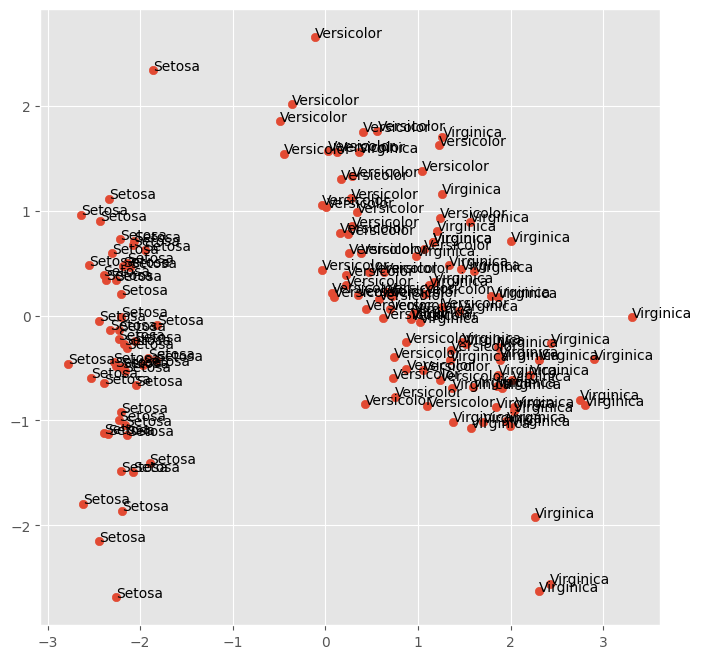

In [116]:
# Example PCA
from numpy.linalg import svd
#X=np.random.rand(10,3)
#X=np.concatenate([X,X], axis=1)
Xs=X_scaled
U, S, VT = svd(Xs)
print(S, Xs.shape)
print(U.shape, S.shape, VT.shape)
Sigma=np.zeros((Xs.shape[0],Xs.shape[1]))
r= np.minimum(Xs.shape[0],Xs.shape[1])
Sigma[0:r,0:r]=np.diag(S)
print(S.shape,(np.linalg.norm(U.dot(Sigma.dot(VT))-Xs)))
k=2
q=sum(S[0:k])/sum(S)
print('q=',q)
X1=U[:,0:k].dot(Sigma[0:k,0:k].dot(VT[0:k,:]))
print(np.linalg.norm(Xs-X1))
Xp=X1.dot(VT.T)
#print(Xp)
Xrp=X1.dot(VT[0:k,:].T)
#print(Xp)
#plt.scatter(Xp[:,0],Xp[:,1])

plt.figure(figsize=(8,8))
plt.scatter(Xrp[:,0],Xrp[:,1])
for label,x,y in zip(labels, Xrp[:,0],Xrp[:,1]):
    plt.annotate(label,xy=(x,y))

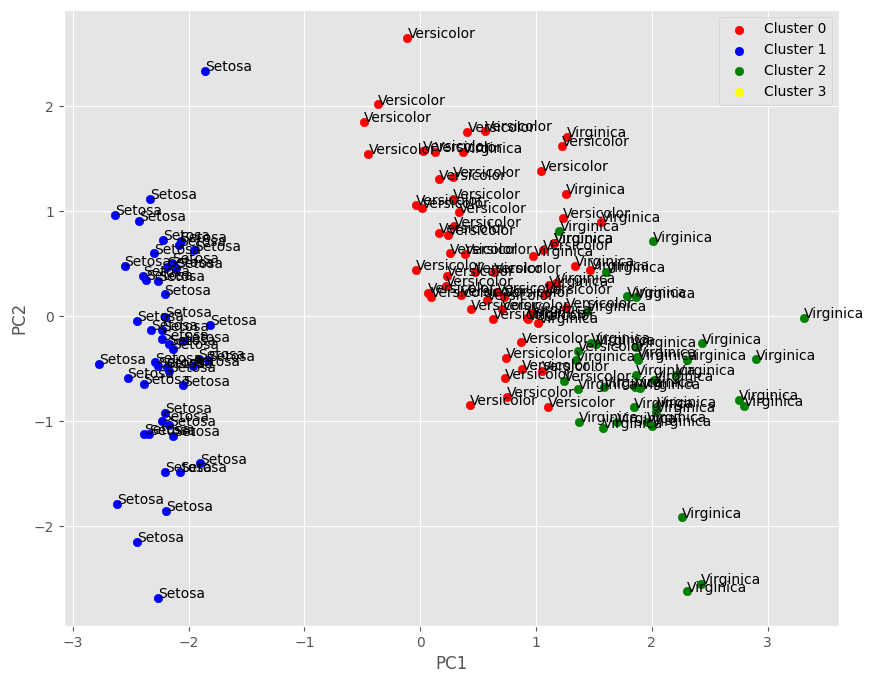

In [117]:
#Visualizing the clusters
plt.figure(figsize=(10,8))
plt.scatter(Xrp[y_kmeans==0,0],Xrp[y_kmeans==0,1],c='red',label = 'Cluster 0')
plt.scatter(Xrp[y_kmeans==1,0],Xrp[y_kmeans==1,1],c='blue',label = 'Cluster 1')
plt.scatter(Xrp[y_kmeans==2,0],Xrp[y_kmeans==2,1],c='green',label = 'Cluster 2')
plt.scatter(Xrp[y_kmeans==3,0],Xrp[y_kmeans==3,1],c='yellow',label = 'Cluster 3')
for label,x,y in zip(labels, Xrp[:,0],Xrp[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()